In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Load ground truth and the match output from seq2single.ipynb 
Note that the ground truth image correspondences are based on their GPS locations. Due to opposing viewpoints, such a matched pair may not have any visual overlap at all. The actual match would be few frames apart. Please refer to [this paper](http://www.roboticsproceedings.org/rss14/p22.pdf) (Section-4B) for more details.

In [2]:
gt = np.loadtxt("../gt/gt_1m-5s.txt")[:,1]
matches = np.loadtxt("../out/matchesOut.txt")[:,1]
matchesBase = np.loadtxt("../out/matchesBaseline.txt")[:,1]

#### Compute recall  

In [3]:
recall = np.array([np.sum(abs(matches-gt) < i) for i in range(100) ]) / len(matches)
recallBase = np.array([np.sum(abs(matchesBase-gt) < i) for i in range(100) ]) / len(matchesBase)

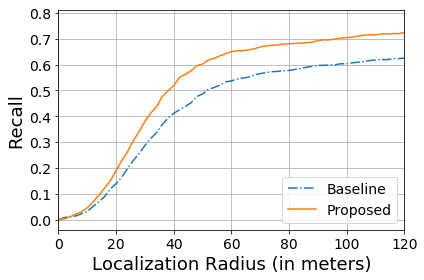

In [4]:
plt.plot(recallBase,'-.',label='Baseline')
plt.plot(recall,'-',label='Proposed')

plt.legend(loc='lower right',fontsize=14)
plt.xlabel("Localization Radius (in meters)",fontsize=18)
plt.ylabel("Recall",fontsize=18)
plt.xticks(np.arange(0,120,10),2*np.arange(0,120,10),fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(0,60)
plt.grid()
plt.tight_layout()
plt.show()